In [11]:
%load_ext autoreload
%autoreload 2

import cv2
import pandas as pd
from ipywidgets import interact

import src.clustering as clustering

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [12]:
wheel_occurrences = pd.read_csv("../others/wheel_occurrences.csv")
IMAGE = cv2.imread("../readme_images/stream_detached.png")

In [13]:
wheel_occurrences_cut = wheel_occurrences[::10]

In [14]:
import ipywidgets as widgets

# Create a min_samples slider
min_samples_slider = widgets.IntSlider(
    value=wheel_occurrences_cut.shape[0]//50,  # Initial value
    min=1,  # Minimum value
    max=wheel_occurrences_cut.shape[0]//10,  # Maximum value
    step=1,  # Incremental step
    description='min_samples:',  # Description label
    continuous_update=False  # Update the value only when the slider is released
)

# Create an eps slider
eps_slider = widgets.FloatSlider(
    value=0.01,  # Initial value
    min=0.001,  # Minimum value
    max=0.02,  # Maximum value
    step=0.0001,  # Incremental step
    description='eps:',  # Description label
    readout_format='.3f',
    continuous_update=False  # Update the value only when the slider is released
)

In [15]:
def update_plot(eps, min_samples):
    clusters = clustering.dbscan_clustering(wheel_occurrences_cut, eps, min_samples)
    clustering.plot_clusters(wheel_occurrences_cut, IMAGE, clusters)

In [16]:
interact(update_plot, eps=eps_slider, min_samples=min_samples_slider)

interactive(children=(FloatSlider(value=0.01, continuous_update=False, description='eps:', max=0.02, min=0.001…

<function __main__.update_plot(eps, min_samples)>

In [17]:
print(wheel_occurrences_cut.shape[0])
clusters = clustering.dbscan_clustering(wheel_data=wheel_occurrences_cut, eps=0.01, min_samples=wheel_occurrences_cut.shape[0]//50)
print("clustering_fin")

17304
clustering_fin


Cluster 0 average position is x         0.501810
y         0.681583
width     0.017536
height    0.027278
dtype: float64.


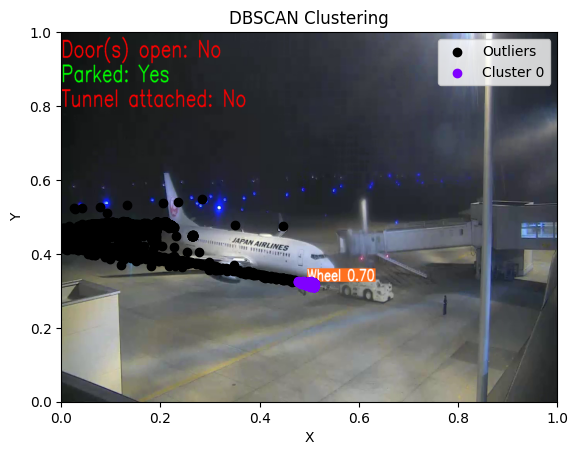

In [18]:
clustering.plot_clusters(wheel_positions=wheel_occurrences_cut, image=IMAGE, clusters=clusters)

In [20]:
cluster_centers = clustering.get_cluster_centers(wheel_occurrences_cut, clusters)
cluster_centers.to_csv("../others/cluster_centers_parking.csv", index=None)